In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Laden des Datensatzes

In [2]:
df = np.loadtxt("oregon_housing_prices.txt",dtype=np.float64,delimiter=",")
data_x = df[:,0:1]*0.3048**2 #Feet to m^2
data_y = df[:,-1]

# Aufgabe 1

#### a) Visualisierung

Visualisieren Sie die Daten, indem Sie ein Streudiagramm in matplotlib zeichnen. Versehen Sie das Diagramm mit Achsenbeschriftungen und mit einem Titel

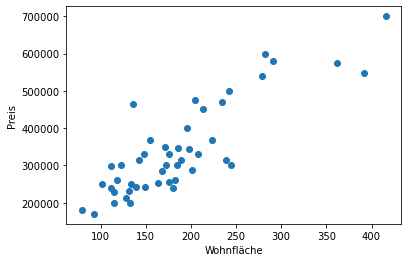

In [5]:

plt.xlabel("Wohnfläche")
plt.ylabel("Preis")
plt.matplotlib.pyplot.scatter(data_x, data_y)

#### b) Lineare Regression mit scikit-learn

Trainieren Sie auf dem gesamten Datensatz ein lineares Regressionsmodell in scikit-learn.

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data_x,data_y)

#### c) Modell-Output

Welche Werte haben die gefitteten Parameter $\theta_0$ und $\theta_1$?

In [10]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

#### d) Visualisierung des Modells

Erstellen Sie das Streudiagramm aus a) neu und zeichnen Sie nun auch die Regressionsgerade mit ein.

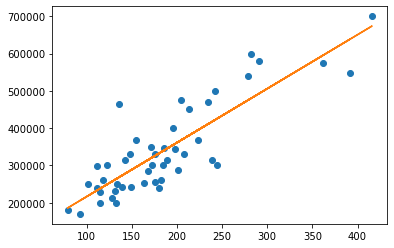

In [24]:
x = np.concatenate(data_x).ravel()
y = data_y


plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x,m*x+b)

#### e) Einsatz des Modells zur Prognose

Welchen Hauspreis prognostiziert das Modell für ein Haus mit $100m^2$ Wohnfläche?

In [38]:
p = [[100]]
#p = p.reshape(-1,1)

reg.predict(p)

array([216072.30702901])

# Aufgabe 2: Lineare Regression durch Lösen der Normalgleichungen

#### a) Aufstellen der Matrix

Stellen Sie die Matrix $X$ (s. Folien) auf. Legen Sie dazu eine neue Matrix der Dimension $(m,2)$ an, die aus lauter 1en besteht und kopieren Sie data_x in die zweite Spalte

In [72]:
#mx = np.ones(shape=(data_x.size,2))
mx = x
mx = mx[:,np.newaxis]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [80]:
mx = np.ones((data_x.size, 2))
mx[:,1] = x

array([[  1.        , 195.46799616],
       [  1.        , 148.644864  ],
       [  1.        , 222.967296  ],
       [  1.        , 131.55070464],
       [  1.        , 278.70912   ],
       [  1.        , 184.4125344 ],
       [  1.        , 142.51326336],
       [  1.        , 132.57263808],
       [  1.        , 128.2061952 ],
       [  1.        , 138.79714176],
       [  1.        , 180.2318976 ],
       [  1.        , 185.80608   ],
       [  1.        , 175.5867456 ],
       [  1.        , 416.01981312],
       [  1.        , 117.80105472],
       [  1.        , 213.676992  ],
       [  1.        , 122.6320128 ],
       [  1.        , 114.82815744],
       [  1.        , 242.38403136],
       [  1.        , 281.58911424],
       [  1.        , 164.15967168],
       [  1.        , 175.40093952],
       [  1.        , 149.01647616],
       [  1.        , 182.27576448],
       [  1.        , 361.3928256 ],
       [  1.        , 102.193344  ],
       [  1.        , 135.45263232],
 

#### b) Aufstellen und Lösen der Normalgleichungen

Berechnen Sie $\theta_0$ und $\theta_1$ durch Lösen der Normalgleichungen. Hinweis: das Matrix-Matrix-Produkt $A\cdot B$   wird in numpy durch den Aufruf $A$@$B$ oder durch Aufruf der Funktion np.dot($A$,$B$) gebildet. Zum Lösen eines linearen Gleichungssystems kann die Funktion numpy.linalg.solve verwendet werden

In [89]:
theta = np.linalg.inv((mx.T@mx))@mx.T@data_y

theta

array([71270.49244873,  1448.0181458 ])

# Aufgabe 3: Gradientenverfahren

In dieser Aufgabe soll die Regressionsaufgabe mit Hilfe des Gradientenverfahrens gelöst werden, das zu implementieren ist.

#### a) Standardisierung

Erstellen Sie zwei numpy-Arrays data_x_std und data_y_std, die durch Standardisierung aus data_x bzw. data_y hervorgehen. Welchen Wert erwarten Sie für $\theta_0$, wenn ein univariates lineares Regressionsmodell auf den standardisierten Daten trainiert wird? Bilden Sie anschließend wieder die Matrix $X$ (s. Folien), indem Sie eine führende Spalte mit 1en zu data_x_std hinzufügen.

In [101]:
def stadard(data):
    median = np.median(data)
    derivation = np.std(data)
    tmp = data
    for i in range(tmp.size):
        tmp[i] = (tmp[i]-median)/derivation
    return tmp
    

In [106]:
x_std = stadard(x)
y_std = stadard(data_y)

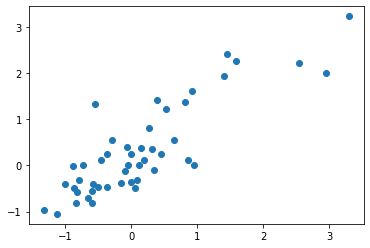

In [107]:
plt.matplotlib.pyplot.scatter(x_std, y_std)

#### b) Least Squares - Kostenfunktional

Vervollständigen Sie die folgende Funktion, die das Least-Squares-Kostenfunktional $J$ realisiert.

In [ ]:
def cost(X, Y, theta):
    """
    This function implements the least squares cost function for univariate linear regression
    Parameters:
        X: m x 2 matrix containing 1s in the first column and the x values of the training samples in the second column
        Y: m x 1 matrix containing the target values of the training samples
        theta: 2 x 1 parameters of the cost function
        
    Returns: 
        value of cost function for a given theta
        
    """
    #TODO

#### c) Gradientenverfahren

Implementieren Sie die folgende Funktion, die das Gradientenverfahren realisiert. Die Iteration soll abbrechen, wenn $\|update\|<1e-5$ gilt, oder wenn max_iter Iterationen durchgeführt wurden.

In [ ]:

def gradientDescent(X, Y, theta, max_iter, alpha):
    """
    This function implements gradient descent for univariate linear regression.
    Parameters:
        X: m x 2 matrix containing 1 in the first column and the x values in the second column
        Y: m x 1 matrix containing the target values 
        theta: initial value for theta
        max_iter: max number of iterations to be carried out
        alpha: step size
    Returns: mx1 matrix containing the regression parameters resulting from the iteration
    """
    #TODO

#### d) Anwendung auf den standardisierten Häuserdatensatz

Wenden Sie das Gradientenverfahren auf den standardisierten Häuserdatensatz an, um die Koeffizienten $\theta_0$ und $\theta_1$ zu bestimmen. Verwenden Sie als Startwert den Nullvektor und die Parameter max_iter=50 sowie alpha=1.0

In [ ]:
#TODO

#### e)  

Verwenden Sie das resultierende Modell, um den prognostizierten Preis für ein Haus mit $100m^2$ zu bestimmen. Transformieren Sie die Daten geeignet. Es sollte derselbe Zahlenwert wie bei Aufgabe 1e herauskommen (ca. 216.000 Euro).

In [ ]:
#TODO